# HW09 (제출기한-5월31일 금요일 18시)
Datascience 모듈 연습을 위한 문제입니다. 
- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 한 셀에 여러줄의 코드를 사용해도 무방합니다.
- <font color=red> 반드시 출력셀의 결과가 예시와 동일하게 출력되도록 코드를 작성하시오. (불필요한 출력을 하는 코드를 작성하지 마시오) </font>

제출시 다음 사항에 유의하기 바랍니다.
- 텍스트 셀에 설명되어 있는 각 문항을 잘 읽은 뒤,
- 코드 셀에 적절한 코드를 작성하기 바랍니다.
- 작성 후 파일명에 ``학번``을 명시후 지정한 공유폴더에 업로드합니다.
- 이때, 공유를 반드시 profkwon@cicweb.ulsan.ac.kr 에게만 합니다.


In [0]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### 다음 데이터를 이용하자.

In [60]:
nba = Table.read_table('nba_salaries.csv').relabeled('2015-2016 SALARY','SALARY')
nba
#salary = nba.with_column('SALARY', np.ceil(nba.column(3))).drop('2015-2016 SALARY')
#salary = nba.with_column('SALARY', nba.column(3).round(1)).drop('2015-2016 SALARY').where('SALARY', are.above(0))
#salary

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


### 문제1
전체 선수들의 연봉 평균을 구하여 ``salary_mean``에 저장하시오. 

In [0]:
salary_mean = np.mean(nba.column('SALARY'))

In [62]:
salary_mean

5.074814482014388

### 문제2
위 ``nba`` Table에서 100명의 선수들을 sampling하여 ``nba_sample``변수에 저장하시오.

(단, replacement=False)

In [0]:
nba_sample = nba.sample(100,with_replacement=False)

In [64]:
nba_sample

PLAYER,POSITION,TEAM,SALARY
Anthony Davis,PF,New Orleans Pelicans,7.07073
Jerel McNeal,SG,Phoenix Suns,0.981348
Tyreke Evans,SG,New Orleans Pelicans,10.7346
Julius Randle,PF,Los Angeles Lakers,3.13224
Trevor Ariza,SF,Houston Rockets,8.19303
Kyle Anderson,SF,San Antonio Spurs,1.14288
Rajon Rondo,PG,Sacramento Kings,9.5
Jason Smith,PF,Orlando Magic,4.3
Chandler Parsons,SF,Dallas Mavericks,15.3615
Shane Larkin,PG,Brooklyn Nets,1.5


### 문제3
``nba_sample``을 10000번 Bootstraping 하여 계산한 평균값 결과 array를 `` bstrap_mean``이라는 변수에 저장하시오. 

In [0]:
def Bootstrap(original_sample, replications):
    means = make_array()
    for i in np.arange(replications):
        resampled_sample = original_sample.sample()
        resampled_means = np.mean(resampled_sample.column('SALARY'))
        means = np.append(means, resampled_means)
        
    return means
  
bstrap_mean = Bootstrap(nba_sample,10000)

In [66]:
bstrap_mean

array([4.59843881, 4.16891148, 4.93750654, ..., 4.53272793, 5.03247007,
       4.92223388])

### 문제4
위 ``bstrap_mean`` 배열로부터 95% 신뢰도를 갖는 평균값 구간을 추정하여 ``(left, right)`` array에 저장하시오.

In [0]:
left = percentile(2.5, bstrap_mean)
right = percentile(97.5, bstrap_mean)

In [68]:
(left, right)

(3.89893631, 6.06487075)

### 문제5
위에서 구한 ``bstrap_mean``에 대하여 histogram을 그리고, ``(left, right)``에 관한 노란색 선을 그리시오. (수업시간 내용 그대로 적용)

(단, bins의 개수는 20개로 설정한다.)


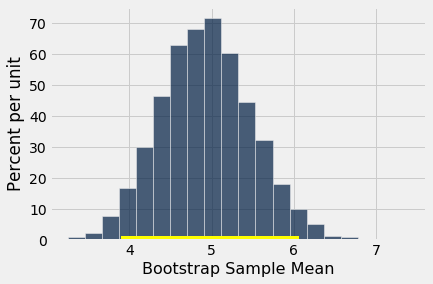

In [69]:
bstrap_means = Table().with_column('Bootstrap Sample Mean', bstrap_mean)
bstrap_means.hist(bins = 20)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8)

### 보너스문제
위 데이터에 대하여 본인이 출제하고 싶은 문제가 있으면 한 문제를 출제하고 아래에 답안 코드를 작성하시오.

위에서 구한 bstrap_mean은 신뢰도 95%구간에서 모집단 salary_mean이 잘 포함되어있는 것을 확인할 수 있다. 이것이 우연한 것인지를 확인하기 위해 위와 같은 과정을 100번 반복하고 신뢰도 95%구간의 정보를 intervals에 저장하여 얼마나 자주 intervals 속에 모집단 salary_mean이 포함되는지 확인하라

In [0]:
def retry_bstrap_mean(replications):
  left_ends = make_array()
  right_ends = make_array()

  for i in np.arange(replications):
      original_sample = nba.sample(100, with_replacement=False)
      result_sample = Bootstrap(original_sample, 10000)
      left_ends = np.append(left_ends, percentile(2.5, result_sample))
      right_ends = np.append(right_ends, percentile(97.5, result_sample))

  intervals = Table().with_columns(
      'Left', left_ends,
      'Right', right_ends
  )
  
  return intervals
  
check_intervals = retry_bstrap_mean(100)

In [71]:
check_intervals.where('Left', are.below(salary_mean)).where('Right', are.above(salary_mean)).num_rows

94